## AdaBoosting, Gradientboosting, XGBoosting Regressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [2]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().any().any()

False

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
df["vehicle_age"]=2023-df.Year

In [9]:
df.Car_Name.value_counts().head(10)

Car_Name
city             26
corolla altis    16
verna            14
fortuner         11
brio             10
ciaz              9
innova            9
i20               9
grand i10         8
jazz              7
Name: count, dtype: int64

In [10]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

In [11]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


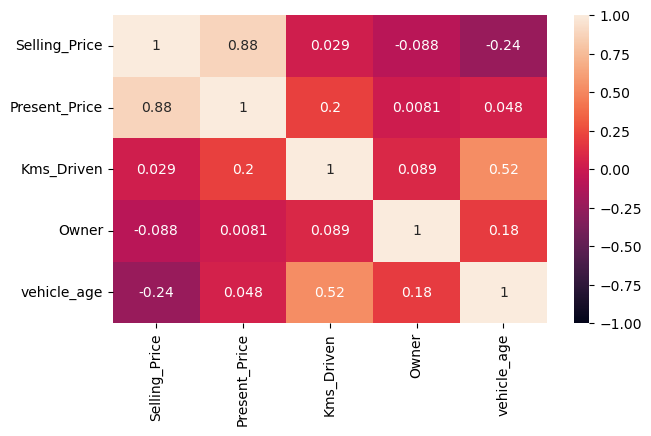

In [12]:
sns.heatmap(df.select_dtypes("number").corr(), 
            annot=True, 
            vmin=-1, 
            vmax=1)
plt.show();

<Axes: xlabel='Selling_Price', ylabel='Count'>

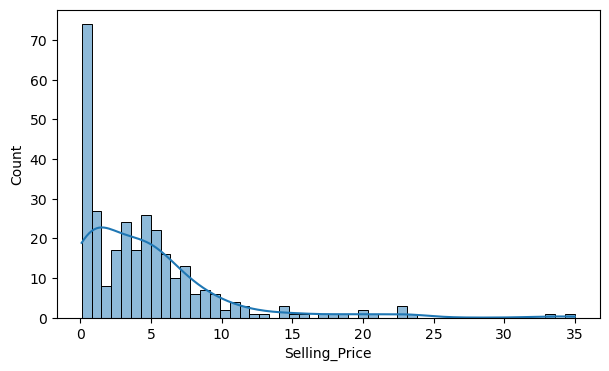

In [13]:
sns.histplot(df.Selling_Price, bins=50, kde=True)

<Axes: >

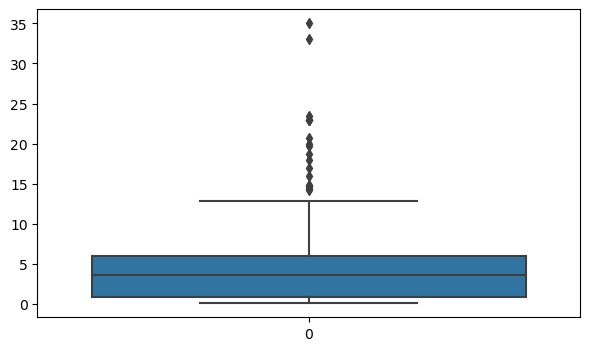

In [14]:
sns.boxplot(df.Selling_Price)

## Train test split

In [15]:
from sklearn.preprocessing import OrdinalEncoder

In [16]:
df_new = df[df.Selling_Price < 10]
df_new.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [17]:
X=df_new.drop("Selling_Price", axis=1)
y=df_new.Selling_Price

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (218, 7)
Train target shape   :  (218,)
Test features shape  :  (55, 7)
Test target shape    :  (55,)


## Modeling with Pipeline for Adaboost Regressor

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae": mean_absolute_error(y_train, y_train_pred),
    "mse": mean_squared_error(y_train, y_train_pred, squared=True),
    "rmse": mean_squared_error(y_train, y_train_pred, squared=False),
    "mape": mean_absolute_percentage_error(y_train, y_train_pred)
   },

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae": mean_absolute_error(y_test, y_pred),
    "mse": mean_squared_error(y_test, y_pred, squared=True),
    "rmse": mean_squared_error(y_test, y_pred, squared=False),
    "mape": mean_absolute_percentage_error(y_test, y_pred)
    }}
    
    return pd.DataFrame(scores)

In [20]:
cat = X.select_dtypes("object").columns
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', 
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), 
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor

#base_estimator=DecisionTreeRegressor(max_depth=3)
operations = [("OrdinalEncoder", column_trans), 
              ("Ada_model", AdaBoostRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# adaboostregressor algoritması default olarak base_estimator=DecisionTreeRegressor(max_depth=3) kullanır.

# adaboostregressor'de  her agacın bulduğu predictionlar ağırlıklandırılarak nihai prediction döndürülür.

# örnek verecek olursak prediction için bir gözlemi modele veriyoruz;
# 1. agaç bu gözlemi 5 olarak tahmin etti;
# 2. agaç 7 olarak tahmin etti;
# 3. agaç  9 olarak tahmin etti.

# 1. agacın ağırlığı 2, ikinci agacın ağırlığı 1, üçüncü agacın ağırlığınında 0.5 olduğunu düşenelim.

# hesaplamayı yaparken ağırlıkları dikkate alarak aşağıdaki gibi yapar:
# pred = (1. agacın tahmini x 1. agacın ağırlığı + 2. agacın tahmini x 2. agacın ağırlığı + 
# 3. agacın tahmini x 3. agacın ağırlığı) / (1. agacın ağırlığı + 2. agacın ağırlığı + 3. agacın ağırlığı)
# (5x2 + 7x1 + 9x0.5) / (2 + 1 + 0.5) = 6.14

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('Ada_model', AdaBoostRegressor(random_state=101))])

In [23]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

# overfiting var görünüyor. CV ile teyit edeceğiz.

,train,test
R2,0.962278,0.919025
mae,0.417010,0.548866
mse,0.274626,0.540513
rmse,0.524047,0.735196
mape,0.425937,0.326673


In [24]:
from sklearn.model_selection import cross_validate

operations = [("OrdinalEncoder", column_trans), 
              ("Ada_model", AdaBoostRegressor(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train, 
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'], 
                        cv =10, 
                        return_train_score=True,
                        return_indices=True)
index=scores.pop("indices")

pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]


test_r2                                     0.904856
train_r2                                    0.962523
test_neg_mean_absolute_error               -0.519941
train_neg_mean_absolute_error              -0.401536
test_neg_mean_squared_error                -0.624804
train_neg_mean_squared_error               -0.272631
test_neg_root_mean_squared_error           -0.756930
train_neg_root_mean_squared_error          -0.521706
test_neg_mean_absolute_percentage_error    -0.371883
train_neg_mean_absolute_percentage_error   -0.333793
dtype: float64

## Gridsearch for Adaboosting

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [26]:
param_grid = {"Ada_model__n_estimators":[10, 20, 30],
              "Ada_model__learning_rate":[0.1, 0.5, 0.8, 1],
              "Ada_model__loss": ['linear', 'square', 'exponential'] #linear mae, square mse
            }

# classificationdan farklı olarak base_estimator=DecisionTreeRegressor(max_depth=3)'dür. classificitinda max_dept=1'di.
# loss ağaç ağırlıklarının hesaplanması için kullanılacak loss functiona belirtir. Deafaultu linear'dir. En iyi loss function
# Gridsearch ile tespit edilmeli.
# yaprakların bölünme şartı için classificationda gini regressionda mse dikkate alınır.

In [27]:
operations = [("OrdinalEncoder", column_trans), 
              ("Ada_model", AdaBoostRegressor(random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

# overfitingi gidermek için base estimator hyperparametreleriylede oynanabilir. Burda base estimatordaki max_depth=2 olarak
# düzenledik overfitingi giderdik

In [28]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('Ada_model',
                                        AdaBoostRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'Ada_model__learning_rate': [0.1, 0.5, 0.8, 1],
                         'Ada_model__loss': ['linear', 'square', 'exponential'],
                         'Ada_model__n_estimators': [10, 20, 30]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [29]:
grid_model.best_params_

{'Ada_model__learning_rate': 1,
 'Ada_model__loss': 'square',
 'Ada_model__n_estimators': 20}

In [30]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('Ada_model',
                 AdaBoostRegressor(learning_rate=1, loss='square',
                                   n_estimators=20, random_state=101))])

In [31]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -0.711469
mean_train_score   -0.557379
Name: 31, dtype: object

In [32]:
operations = [("OrdinalEncoder", column_trans), 
              ("Ada_model", AdaBoostRegressor(learning_rate=1,
                                              loss='square', 
                                              n_estimators=20, 
                                              random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                                     0.916117
train_r2                                    0.957287
test_neg_mean_absolute_error               -0.475161
train_neg_mean_absolute_error              -0.407543
test_neg_mean_squared_error                -0.547916
train_neg_mean_squared_error               -0.310819
test_neg_root_mean_squared_error           -0.711469
train_neg_root_mean_squared_error          -0.557379
test_neg_mean_absolute_percentage_error    -0.293541
train_neg_mean_absolute_percentage_error   -0.267484
dtype: float64

In [33]:
prediction = grid_model.predict(X_test)

ada_rmse=mean_squared_error(y_test, prediction, squared=False)
ada_mape=mean_absolute_percentage_error(y_test, prediction)


train_val(grid_model, X_train, y_train, X_test, y_test)

# CV ve test seti rmse skorları çok tutarlı.

,train,test
R2,0.958601,0.901610
mae,0.394184,0.558682
mse,0.301397,0.656760
rmse,0.548996,0.810407
mape,0.274646,0.256922


## Feature importance

In [34]:
operations = [("OrdinalEncoder", column_trans),
              ("Ada_model", AdaBoostRegressor(learning_rate=1,
                                              loss='square', 
                                              n_estimators=20, 
                                              random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('Ada_model',
                 AdaBoostRegressor(learning_rate=1, loss='square',
                                   n_estimators=20, random_state=101))])

In [35]:
pipe_model["Ada_model"].feature_importances_

array([0.07529136, 0.09763278, 0.00323458, 0.57577149, 0.08091136,
       0.        , 0.16715843])

In [36]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['Fuel_Type', 'Seller_Type', 'Transmission', 'Present_Price',
       'Kms_Driven', 'Owner', 'vehicle_age'], dtype=object)

In [37]:
imp_feats = pd.DataFrame(data=pipe_model["Ada_model"].feature_importances_,
                         columns=['ada_Importance'], 
                         index=features)

ada_imp_feats = imp_feats.sort_values('ada_Importance', ascending=False)
ada_imp_feats

,ada_Importance
Present_Price,0.575771
vehicle_age,0.167158
Seller_Type,0.097633
Kms_Driven,0.080911
Fuel_Type,0.075291
Transmission,0.003235
Owner,0.000000


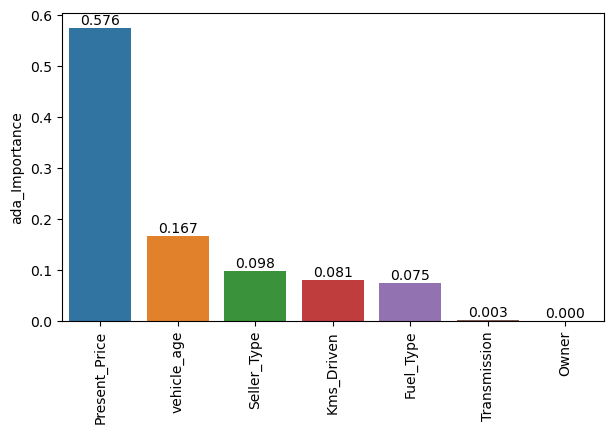

In [38]:
ax = sns.barplot(data=ada_imp_feats,
                 x=ada_imp_feats.index,
                 y='ada_Importance')

ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

## Modeling with Pipeline for Gradient Boosting Regressor

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

operations = [("OrdinalEncoder", column_trans), 
              ("GB_model", GradientBoostingRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('GB_model', GradientBoostingRegressor(random_state=101))])

In [40]:
# datamızda 2 araba olsun ilk araba fiyatı 100, ikinci araba fiyatı 200
# initial price (arabaların ortalama fiyatı): (100+200)/2 = 150
# ilk arabanın ilk residual değeri 100-150 = -50
# ilk arabanın ikinci residual değeri -30
# ikinci arabanın ilk residual değeri 200-150 = 50
# ikinci arabanın ikinci residual değeri 25
# modelimiz 2 agaçtan oluşuyor.
# learning rate: 0.1

# ilk araba fiyat tahmini   :150 + 0.1 * (-50) + 0.1*(-30)

# ikinci araba fiyat tahmini: 150 + 0.1 * 50 + 0.1*25

# Regression problemlerinde datadaki tüm gözlemlerin ortalaması alınır. Bu sabit değerler ile gerçek değerler arasındaki 
# fark (resdualler) hesaplanır. Ve model bu residualleri 0'a yakınsatmaya çalışır. 

# clasificationda olduğu gibi her agaçta hesaplanan residual değeri ile learning rate çarpılıp başlangıç değerine ilave edilerek
# tahmin yapılacak.

# Tüm arabaların ortalama değeri arabaların başlangıç değeri olacak. Ve her agaçta bulunan değerler bu başlangıç değerine 
# ilave edilecek.

In [41]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.992689,0.947717
mae,0.161097,0.416107
mse,0.053229,0.348994
rmse,0.230713,0.590757
mape,0.073572,0.163453


In [42]:
operations = [("OrdinalEncoder", column_trans), 
              ("GB_model", GradientBoostingRegressor(random_state=101))]

model = Pipeline(steps=operations)
scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True)

pd.DataFrame(scores).mean()[2:]

test_r2                                     0.936006
train_r2                                    0.993508
test_neg_mean_absolute_error               -0.395431
train_neg_mean_absolute_error              -0.151750
test_neg_mean_squared_error                -0.413922
train_neg_mean_squared_error               -0.047230
test_neg_root_mean_squared_error           -0.612970
train_neg_root_mean_squared_error          -0.217152
test_neg_mean_absolute_percentage_error    -0.173175
train_neg_mean_absolute_percentage_error   -0.070299
dtype: float64

## Gridsearch for Gradientboosting

In [43]:
param_grid = {"GB_model__n_estimators":[20, 35], 
              "GB_model__subsample":[0.8, 1], 
              "GB_model__max_features" : [5,6, None],
              "GB_model__learning_rate": [0.08, 0.1, 0.2], 
              'GB_model__max_depth':[1,2],
              'GB_model__min_samples_split':[2,3],
              'GB_model__min_samples_leaf':[1,2]}

# classificationdan en önemli farkı loss='squared_error'dür. Classifciationda bu logloss'tu hatırlarsanız.

In [44]:
operations = [("OrdinalEncoder", column_trans), 
              ("GB_model", GradientBoostingRegressor(random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [45]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('GB_model',
                                        GradientBoostingRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'GB_model__learning_rate': [0.08, 0.1, 0.2],
                         'GB_model__max_depth': [1, 2],
                         'GB_model__max_features': [5, 6, None],
                         'GB_model__min_samples_leaf': [1, 2],
                         'GB_model__min_samples_split': [2, 3],
                         'GB_model__n_estimators': [20, 35],
                         'GB_model__subsample': [0.8, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [46]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('GB_model',
                 GradientBoostingRegressor(learning_rate=0.2, max_depth=2,
                                           max_features=5, n_estimators=35,
                                           random_state=101, subsample=0.8))])

In [47]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -0.600975
mean_train_score   -0.435989
Name: 242, dtype: object

In [48]:
operations = [("OrdinalEncoder", column_trans), 
              ("GB_model", GradientBoostingRegressor(learning_rate=0.2, 
                                                     max_depth=2, 
                                                     max_features=5,
                                                     n_estimators=35,
                                                     subsample=0.8,
                                                     random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                                     0.946504
train_r2                                    0.973839
test_neg_mean_absolute_error               -0.427436
train_neg_mean_absolute_error              -0.322053
test_neg_mean_squared_error                -0.368113
train_neg_mean_squared_error               -0.190398
test_neg_root_mean_squared_error           -0.600975
train_neg_root_mean_squared_error          -0.435989
test_neg_mean_absolute_percentage_error    -0.224985
train_neg_mean_absolute_percentage_error   -0.201184
dtype: float64

In [49]:
prediction = grid_model.predict(X_test)

gradient_rmse = mean_squared_error(y_test, prediction, squared=False)
gradient_mape=mean_absolute_percentage_error(y_test, prediction)

train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.972820,0.950462
mae,0.333209,0.444475
mse,0.197876,0.330667
rmse,0.444833,0.575036
mape,0.206715,0.233511


## Feature importance

In [50]:
operations = [("OrdinalEncoder", column_trans), 
              ("GB_model", GradientBoostingRegressor(learning_rate=0.2, 
                                                     max_depth=2, 
                                                     max_features=5,
                                                     n_estimators=35,
                                                     subsample=0.8,
                                                     random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('GB_model',
                 GradientBoostingRegressor(learning_rate=0.2, max_depth=2,
                                           max_features=5, n_estimators=35,
                                           random_state=101, subsample=0.8))])

In [51]:
pipe_model["GB_model"].feature_importances_

array([1.26268232e-01, 1.67853365e-01, 1.43993941e-03, 5.65890576e-01,
       3.43143061e-02, 1.52119647e-04, 1.04081462e-01])

In [52]:
imp_feats = pd.DataFrame(data=pipe_model["GB_model"].feature_importances_,
                         columns=['grad_Importance'], 
                         index=features)
grad_imp_feats = imp_feats.sort_values('grad_Importance', ascending=False)
grad_imp_feats

,grad_Importance
Present_Price,0.565891
Seller_Type,0.167853
Fuel_Type,0.126268
vehicle_age,0.104081
Kms_Driven,0.034314
Transmission,0.001440
Owner,0.000152


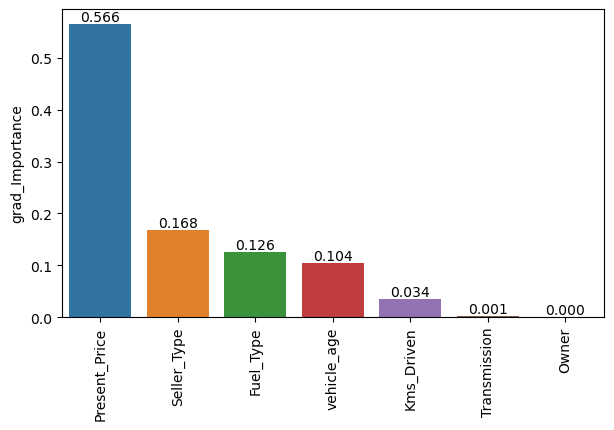

In [53]:
ax = sns.barplot(data=grad_imp_feats, 
                 x=grad_imp_feats.index, 
                 y='grad_Importance')

ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

## Modeling with Pipeline for XG Boost Regressor

In [54]:
import xgboost as xgb

xgb.__version__

'1.7.3'

In [55]:
from xgboost import XGBRegressor

operations = [("OrdinalEncoder", column_trans), 
              ("XGB_model", XGBRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# classificationda objective='binary:logistic' iken regressionda 'reg:squarederror'dür. 
# diğer parametreler classificitonla aynıdır.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              col...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=101, ...))])

In [56]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.999997,0.929709
mae,0.002903,0.443122
mse,0.000019,0.469198
rmse,0.004318,0.684980
mape,0.002216,0.175504


In [57]:
operations = [("OrdinalEncoder", column_trans), 
              ("XGB_model", XGBRegressor(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train, 
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True)
pd.DataFrame(scores).iloc[:, 2:].mean()

# overfiting var.

test_r2                                     0.938795
train_r2                                    0.999998
test_neg_mean_absolute_error               -0.400328
train_neg_mean_absolute_error              -0.002347
test_neg_mean_squared_error                -0.409225
train_neg_mean_squared_error               -0.000012
test_neg_root_mean_squared_error           -0.628599
train_neg_root_mean_squared_error          -0.003384
test_neg_mean_absolute_percentage_error    -0.171095
train_neg_mean_absolute_percentage_error   -0.001890
dtype: float64

## Gridsearch for XGBoost

In [58]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [59]:
param_grid = {"XGB_model__n_estimators":[25, 30],
              "XGB_model__max_depth":[4,5], 
              "XGB_model__learning_rate": [0.05, 0.06],
              "XGB_model__subsample": [0.5, 0.8], 
              "XGB_model__colsample_bytree":[0.5, 0.8, 1],
              "XGB_model__colsample_bylevel":[0.5, 0.8, 1]
              }

In [60]:
operations = [("OrdinalEncoder", column_trans),
              ("XGB_model", XGBRegressor(random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [61]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('XGB_model',
                                        XGBRegressor(base_score=None,
                                                     bo...
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bylevel': [0.5, 0.8, 1],
                         'XGB_model__colsample_bytree': [0.5, 0.8, 1],
                         'XGB_model__learning_rate': [0.05, 0.06],
                         'XGB_model__max_depth': [4, 5],
                         'XGB_model__n_estimators': [25, 30],
                         'XGB_model__subsample': [0.5, 0.8]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [62]:
grid_model.best_params_

{'XGB_model__colsample_bylevel': 1,
 'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.06,
 'XGB_model__max_depth': 5,
 'XGB_model__n_estimators': 30,
 'XGB_model__subsample': 0.8}

In [63]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              col...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.06,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=30,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=101, ...))])

In [64]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

# overfiting olmadığını gördük.

mean_test_score    -0.9511
mean_train_score   -0.8528
Name: 143, dtype: object

In [65]:
operations = [("OrdinalEncoder", column_trans), 
              ("XGB_model", XGBRegressor(n_estimators=30,
                                         learning_rate=0.06, 
                                         max_depth=5,
                                         subsample=0.8, 
                                         random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train, 
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                     0.8663
train_r2                                    0.9000
test_neg_mean_absolute_error               -0.6115
train_neg_mean_absolute_error              -0.5453
test_neg_mean_squared_error                -0.9450
train_neg_mean_squared_error               -0.7274
test_neg_root_mean_squared_error           -0.9511
train_neg_root_mean_squared_error          -0.8528
test_neg_mean_absolute_percentage_error    -0.1999
train_neg_mean_absolute_percentage_error   -0.1586
dtype: float64

In [66]:
prediction = grid_model.predict(X_test)

xgb_rmse = mean_squared_error(y_test, prediction, squared=False)
xgb_mape=mean_absolute_percentage_error(y_test, prediction)

train_val(grid_model, X_train, y_train, X_test, y_test) 

,train,test
R2,0.8993,0.8588
mae,0.5464,0.6256
mse,0.7328,0.9422
rmse,0.8560,0.9707
mape,0.1593,0.1775


## Feature importance

In [67]:
operations = [("OrdinalEncoder", column_trans), 
              ("XGB_model", XGBRegressor(n_estimators=30,
                                         learning_rate=0.06, 
                                         max_depth=5,
                                         subsample=0.8, 
                                         random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              col...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.06,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=30,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=101, ...))])

In [68]:
pipe_model["XGB_model"].feature_importances_

array([0.05125613, 0.08842014, 0.00549508, 0.71977526, 0.03199382,
       0.        , 0.1030596 ], dtype=float32)

In [69]:
features

array(['Fuel_Type', 'Seller_Type', 'Transmission', 'Present_Price',
       'Kms_Driven', 'Owner', 'vehicle_age'], dtype=object)

In [70]:
imp_feats = pd.DataFrame(data=pipe_model["XGB_model"].feature_importances_,
                         columns=['xgb_Importance'],
                         index=features)

xgb_imp_feats = imp_feats.sort_values('xgb_Importance', ascending=False)
xgb_imp_feats

,xgb_Importance
Present_Price,0.7198
vehicle_age,0.1031
Seller_Type,0.0884
Fuel_Type,0.0513
Kms_Driven,0.0320
Transmission,0.0055
Owner,0.0000


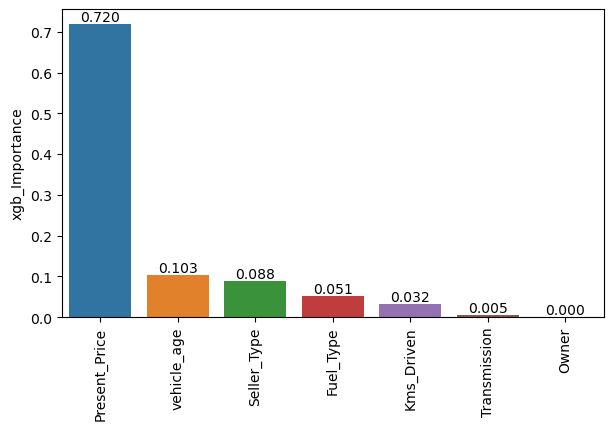

In [71]:
ax = sns.barplot(data=xgb_imp_feats, 
                 x=xgb_imp_feats.index, 
                 y='xgb_Importance')

ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

## Feature importance comparison

In [72]:
pd.concat([xgb_imp_feats, grad_imp_feats, ada_imp_feats], axis=1)

,xgb_Importance,grad_Importance,ada_Importance
Present_Price,0.7198,0.5659,0.5758
vehicle_age,0.1031,0.1041,0.1672
Seller_Type,0.0884,0.1679,0.0976
Fuel_Type,0.0513,0.1263,0.0753
Kms_Driven,0.0320,0.0343,0.0809
Transmission,0.0055,0.0014,0.0032
Owner,0.0000,0.0002,0.0000


## compare scores

[Text(0, 0, '0.178'), Text(0, 0, '0.234'), Text(0, 0, '0.257')]

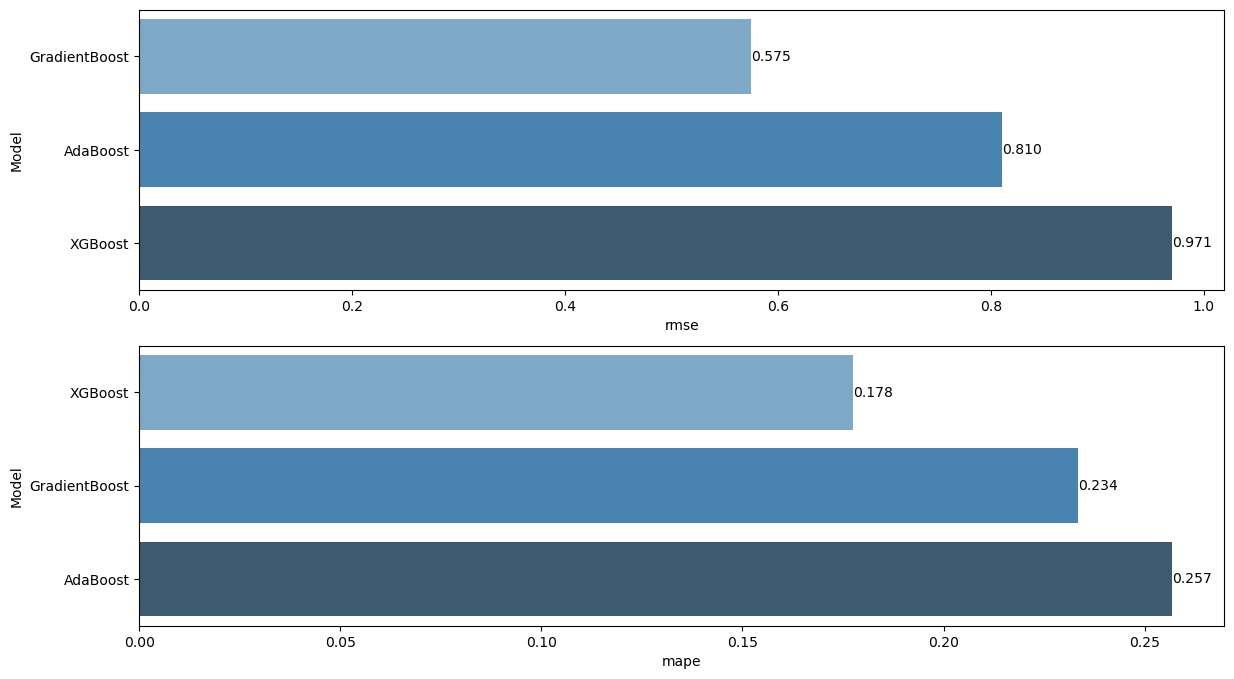

In [73]:
compare = pd.DataFrame({"Model": ["AdaBoost","GradientBoost", "XGBoost"],
                        "rmse": [ada_rmse, gradient_rmse, xgb_rmse],
                        "mape": [ada_mape, gradient_mape, xgb_mape]})

plt.figure(figsize=(14,8))
plt.subplot(211)
compare = compare.sort_values(by="rmse", ascending=True)
ax=sns.barplot(x="rmse", 
               y="Model", 
               data=compare, 
               palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(212)
compare = compare.sort_values(by="mape", ascending=True)
ax=sns.barplot(x="mape", 
               y="Model", 
               data=compare, 
               palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")


## Feature Selection and Final Model

In [74]:
X2 = X[["Present_Price", "Seller_Type", "vehicle_age"]]
X2.head()

,Present_Price,Seller_Type,vehicle_age
0,5.5900,Dealer,9
1,9.5400,Dealer,10
2,9.8500,Dealer,6
3,4.1500,Dealer,12
4,6.8700,Dealer,9


In [75]:
cat2 = X2.select_dtypes("object").columns
cat2

Index(['Seller_Type'], dtype='object')

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', 
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat2), 
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")

operations = [("OrdinalEncoder", column_trans), 
              ("XGB_model", XGBRegressor(n_estimators=30,
                                         learning_rate=0.06, 
                                         max_depth=5,
                                         subsample=0.8, 
                                         random_state=101))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X2, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Seller_Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsamp...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.06,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=30,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=101, ...))])

In [77]:
pipe_model["OrdinalEncoder"].fit_transform(X2).head()

,Seller_Type,Present_Price,vehicle_age
0,0.0000,5.5900,9
1,0.0000,9.5400,10
2,0.0000,9.8500,6
3,0.0000,4.1500,12
4,0.0000,6.8700,9


## Prediction

In [78]:
samples = {"Present_Price": [7, 9.5],
           "Kms_Driven": [25000, 44000],
           "Fuel_Type":["Petrol", "Diesel"],
           'Seller_Type':['Dealer', 'Individual'],
           'Transmission': ['Manual', 'Automatic'],
           "Owner":[0,1],
           "vehicle_age":[7, 9]}

In [79]:
df_samples = pd.DataFrame(samples)
df_samples

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,7.0000,25000,Petrol,Dealer,Manual,0,7
1,9.5000,44000,Diesel,Individual,Automatic,1,9


In [80]:
pipe_model.predict(df_samples)

array([4.4562387, 5.4135804], dtype=float32)